In [20]:
import pandas as pd
from random import *
import matplotlib.pyplot as plt
import numpy as np

In [21]:
dic = {
    "consommation_kWh" : [i + randint(-200, 200) for i in np.arange(10000, 15040, 30)],
}

df = pd.DataFrame(dic)
df

,consommation_kWh
0,9847
1,10063
2,9904
3,9930
4,10094
...,...
163,14885
164,14996
165,14909
166,15084


In [22]:
df.shape

(168, 1)

In [23]:
df['mois'] = np.tile(np.arange(1,13), df.shape[0]//12)
df

,consommation_kWh,mois
0,9847,1
1,10063,2
2,9904,3
3,9930,4
4,10094,5
...,...,...
163,14885,8
164,14996,9
165,14909,10
166,15084,11


In [24]:
df['annee'] = (df.index // 12) + 2010
df

,consommation_kWh,mois,annee
0,9847,1,2010
1,10063,2,2010
2,9904,3,2010
3,9930,4,2010
4,10094,5,2010
...,...,...,...
163,14885,8,2023
164,14996,9,2023
165,14909,10,2023
166,15084,11,2023


In [25]:
df['CO2_kg'] = (df['consommation_kWh']**1.5) * 0.0015 + (randint(-1, 1)*(np.random.randn(len(df))*50))
df

,consommation_kWh,mois,annee,CO2_kg
0,9847,1,2010,1572.184358
1,10063,2,2010,1480.399633
2,9904,3,2010,1394.176853
3,9930,4,2010,1500.440278
4,10094,5,2010,1620.859860
...,...,...,...,...
163,14885,8,2023,2764.484602
164,14996,9,2023,2636.440347
165,14909,10,2023,2717.749686
166,15084,11,2023,2707.667045


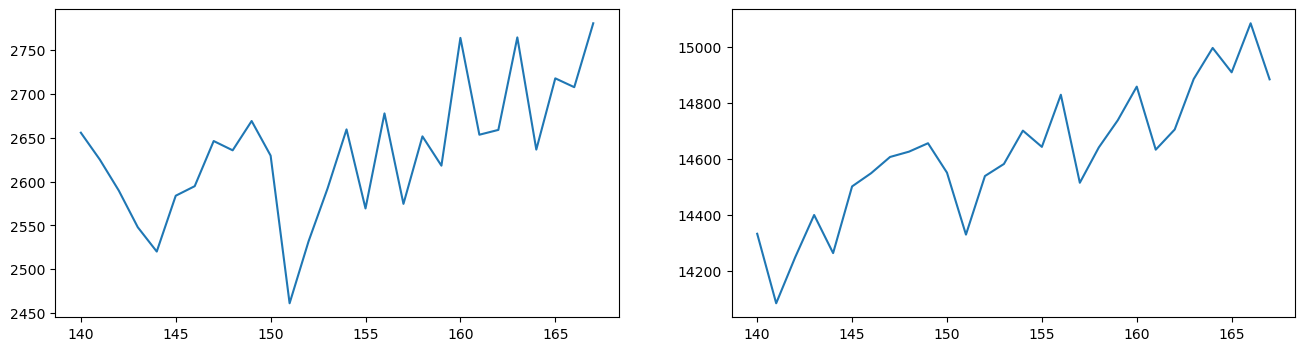

In [26]:
plt.figure(figsize=(16,4))
plt.subplot(121)
df[140:]['CO2_kg'].plot()
plt.subplot(122)
df[140:]['consommation_kWh'].plot()
plt.show()

In [27]:
n = df.shape[0]
mois = n // 12
nbr = np.linspace(0.1, 0.25, mois)
df['prix_EUR'] = df['consommation_kWh'] * np.repeat(nbr, 12)[:n]
df

,consommation_kWh,mois,annee,CO2_kg,prix_EUR
0,9847,1,2010,1572.184358,984.70
1,10063,2,2010,1480.399633,1006.30
2,9904,3,2010,1394.176853,990.40
3,9930,4,2010,1500.440278,993.00
4,10094,5,2010,1620.859860,1009.40
...,...,...,...,...,...
163,14885,8,2023,2764.484602,3721.25
164,14996,9,2023,2636.440347,3749.00
165,14909,10,2023,2717.749686,3727.25
166,15084,11,2023,2707.667045,3771.00


In [28]:
df.to_csv('dataSets.csv')

In [29]:
def f(x) :
    mois = ['Janvier','Fevrier','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Decembre']
    return mois[x-1]

df['mois'] = df['mois'].apply(f)

In [30]:
moy_annee = df.groupby('annee', as_index=False )[['consommation_kWh']].mean()
moy_annee

,annee,consommation_kWh
0,2010,10163.500000
1,2011,10543.833333
2,2012,10945.333333
3,2013,11244.666667
4,2014,11571.000000
5,2015,11966.833333
6,2016,12278.250000
7,2017,12658.666667
8,2018,12999.666667
9,2019,13391.583333


In [31]:
df[120:].to_json('dataSets_appli.json')

In [32]:
moy_annee.to_csv('moy_annee.csv')

In [33]:
moy_annee[10:].to_json('moy_annee_appli.json')